# "Driving Behaviour" Dataset EDA

### Content
- [Data Preparation](#Data-Preparation)
- [Data Analysis](#Data-Analysis)
- [Conclusion](#Conclusion)

## Data Preparation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Driving_Behavior_Dataset.csv")
df.describe()

,Class,TaskID,Hour,Minute,Second,GyroX,GyroY,GyroZ,AccX,AccY,AccZ
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,2.490126,14.039497,14.138241,27.129264,27.045781,-0.829957,4.122309,1.076404,0.252417,-0.095110,-0.983215
std,1.051415,8.071906,1.151861,13.918108,16.892894,3.404297,3.252790,12.049384,0.183155,0.190407,0.098061
min,1.000000,1.000000,12.000000,0.000000,0.000000,-14.946565,-10.351145,-50.259542,-0.252686,-0.793457,-1.367920
25%,2.000000,7.000000,14.000000,18.000000,13.000000,-2.274809,2.610687,0.282443,0.132202,-0.179077,-1.031372
50%,3.000000,14.000000,15.000000,26.000000,24.000000,-0.698473,4.290076,0.961832,0.244507,-0.102295,-0.986938
75%,3.000000,21.000000,15.000000,36.000000,42.000000,0.784351,5.761450,1.992366,0.372559,-0.023010,-0.928223
max,4.000000,33.000000,15.000000,58.000000,59.000000,12.778626,16.793893,45.442748,0.747803,0.768555,-0.456787


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     1114 non-null   int64  
 1   DriverID  1114 non-null   object 
 2   TaskID    1114 non-null   int64  
 3   Hour      1114 non-null   int64  
 4   Minute    1114 non-null   int64  
 5   Second    1114 non-null   int64  
 6   GyroX     1114 non-null   float64
 7   GyroY     1114 non-null   float64
 8   GyroZ     1114 non-null   float64
 9   AccX      1114 non-null   float64
 10  AccY      1114 non-null   float64
 11  AccZ      1114 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 104.6+ KB


No null values, data is ready for analysis

## Data Analysis

Data analysis part will explore the dataset for interesting correlations and questions we may ask and attempt to answer

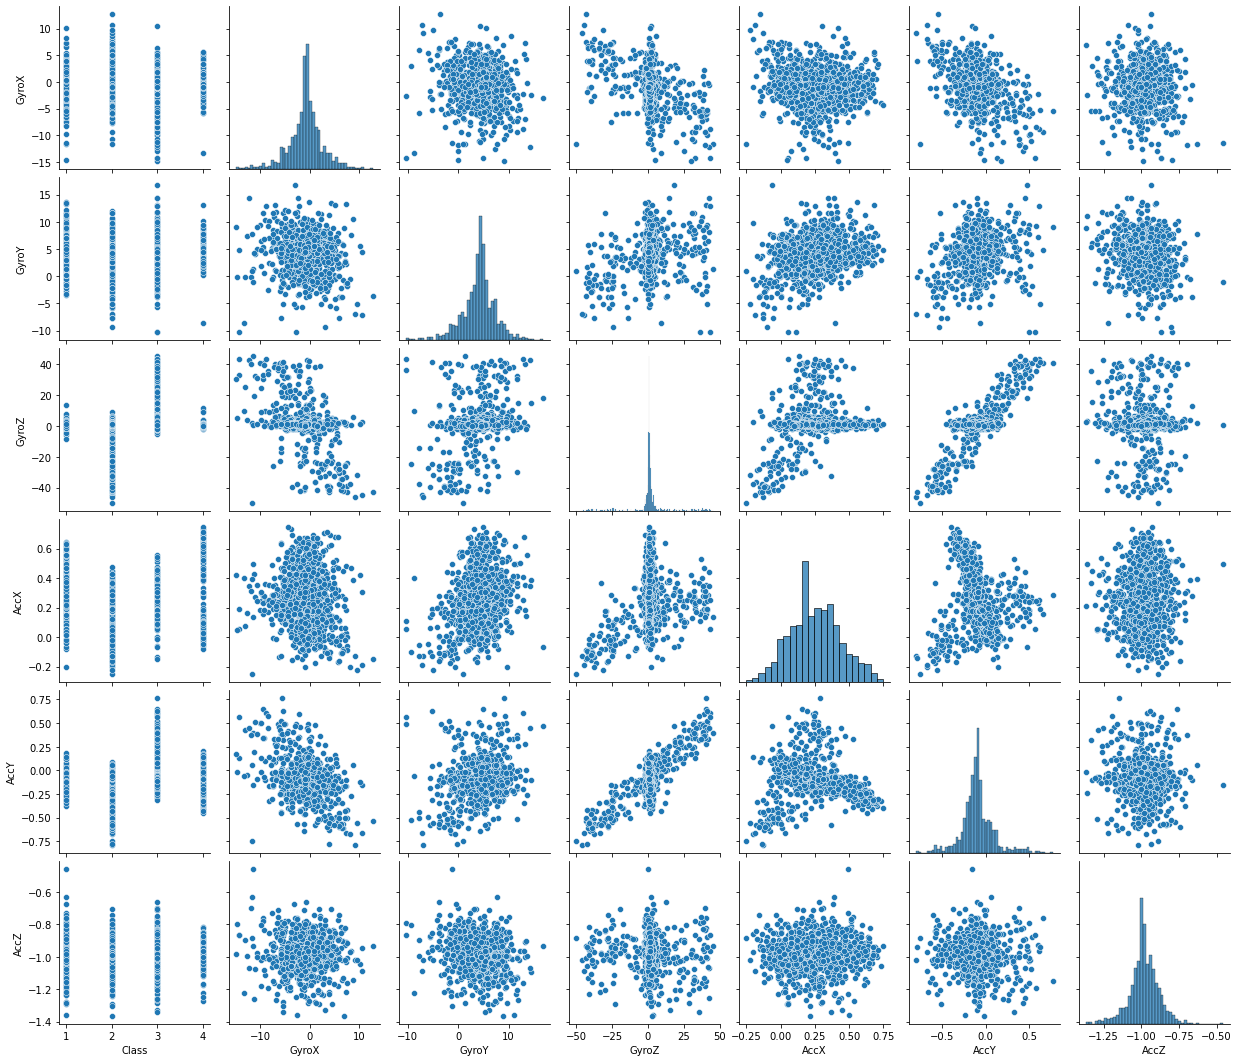

In [5]:
sns.pairplot(df, y_vars=["GyroX","GyroY", "GyroZ", "AccX", "AccY", "AccZ"], x_vars=["Class","GyroX","GyroY", "GyroZ", "AccX", "AccY", "AccZ"])

Notable relations include `AccY` and `GyroZ`, `Class` and `GyroZ`, `Class` and `AccY`

We will explore these relations further in relation to `Class`

<AxesSubplot:xlabel='GyroX', ylabel='GyroY'>

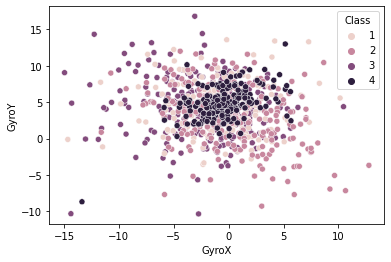

In [20]:
sns.scatterplot(data=df, x="GyroX", y="GyroY", hue="Class")

<AxesSubplot:xlabel='GyroX', ylabel='GyroZ'>

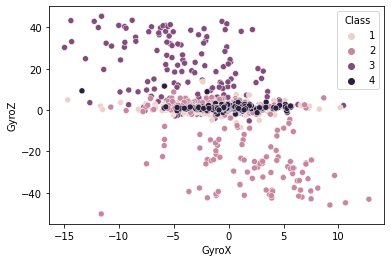

In [22]:
sns.scatterplot(data=df, x="GyroX", y="GyroZ", hue="Class")

<AxesSubplot:xlabel='GyroY', ylabel='GyroZ'>

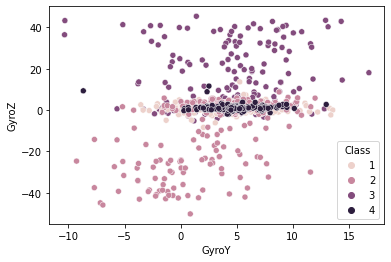

In [23]:
sns.scatterplot(data=df, x="GyroY", y="GyroZ", hue="Class")

Some clear Class distinction in `GyroZ > 0` and `GyroZ <0`

### Thus

There seems to be a higher information gain given the "GyroZ" attribute

<AxesSubplot:xlabel='AccX', ylabel='AccY'>

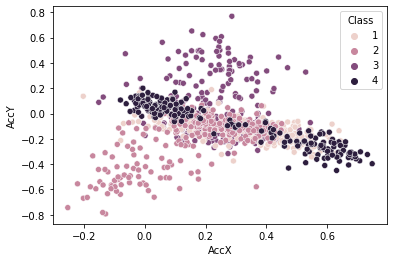

In [19]:
sns.scatterplot(data=df, x="AccX", y="AccY", hue="Class")

<AxesSubplot:xlabel='AccX', ylabel='AccZ'>

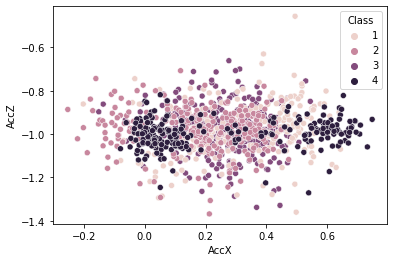

In [21]:
sns.scatterplot(data=df, x="AccX", y="AccZ", hue="Class")

<AxesSubplot:xlabel='AccY', ylabel='AccZ'>

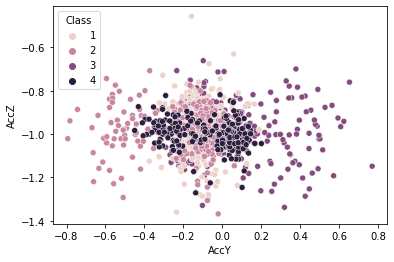

In [24]:
sns.scatterplot(data=df, x="AccY", y="AccZ", hue="Class")

Some clear Class distinction in `GyroZ > 0` and `GyroZ <0`

### Note
There seems to be a higher information gain given the "Acc Y" attribute

Now to utilize the previous findings

<AxesSubplot:xlabel='AccY', ylabel='GyroZ'>

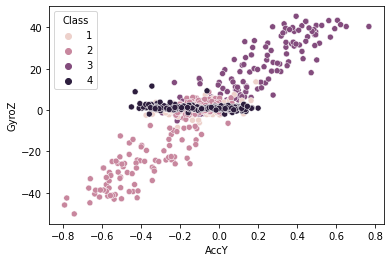

In [25]:
sns.scatterplot(data=df, x="AccY", y="GyroZ", hue="Class")

As shown in the pairplot, the `GyroZ` and `AccY` attributes give the clearest `Class` distinction

The distinction between classes `1` and `4` are harder to find

## Conclusion

This dataset explores the differentiation between different classes of aggresive driving behaviour, namely; `Sudden Brake`, `Sudden Acceleration`, `Sudden right turn` and `Sudden left turn`. This dataset may prove helpful in exploring a classification problem on aggresive driver behaviour.

### Pros:
- Sufficient number of entries for a small application
- Tested on different vehicle types

### Cons: 
- Tested on low speeds that may be inapplicable to Egypt
- Unknown road conditions introduce unfairness
- Small number of attributes

### Final Thoughts:
This dataset may be helpful in other small applications, but cannot stand on its own to be the basis for a "Transportation Safety" application since it does not account for many factors including; Driver condition, road conditions, weather conditions or even road speed limits and traffic lights. My recommendation would be to look for a dataset with such properties

[Recommended dataset](https://www.kaggle.com/datasets/gloseto/traffic-driving-style-road-surface-condition?resource=download)
